In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy
from nltk.stem import WordNetLemmatizer

In [3]:
data = pd.read_csv('data/data_cleaned.csv', usecols=['subreddit', 'text', 'spacy'],
                   lineterminator='\n') # Had to use this because of errors in reading the data
                                        # See here: https://stackoverflow.com/questions/33998740/error-in-reading-a-csv-file-in-pandascparsererror-error-tokenizing-data-c-err

In [4]:
data

,subreddit,text,spacy
0,NoStupidQuestions,Are there laws on education in international w...,law on education in international water s...
1,NoStupidQuestions,Why can't some people not eat pork? Not be...,why not some people not eat pork not beca...
2,NoStupidQuestions,"Preference or Allergy Just wondering, now ...",preference or Allergy just wonder now whe...
3,NoStupidQuestions,Do I need to update card info on everything? ...,need to update card info on get a new car...
4,NoStupidQuestions,Any single ladies out there who wanna give an ...,any single lady out there give an ugly guy wit...
...,...,...,...
29591,AskReddit,"Im on a mission, down vote me to hell.",m on a mission down vote to hell
29592,AskReddit,LGBTQ+ community of Reddit what would you say ...,LGBTQ+ community of Reddit say the symbol of s...
29593,AskReddit,What is the most beautiful message you have ev...,the most beautiful message ever receive
29594,AskReddit,Are politics really getting increasingly polar...,politic really increasingly polarize or social...


## In this EDA I am going to compare the performance of the `spacy` lemmatizer and the `nltk.stem` lemmatizer. I will do this by comparing word length and character length distributions, unique word distributions, as well as most frequent words present in the data. 

In [5]:
data['text_word_count'] = data['text'].map(lambda x: len(x.split()))

data['text_unique_word_count'] = data['text'].map(lambda x: len(np.unique(x.split())))

data['text_review_length'] = data['text'].map(len)

data['spacy_word_count'] = data['spacy'].map(lambda x: len(x.split()))

data['spacy_unique_word_count'] = data['spacy'].map(lambda x: len(np.unique(x.split())))

data['spacy_review_length'] = data['spacy'].map(len)

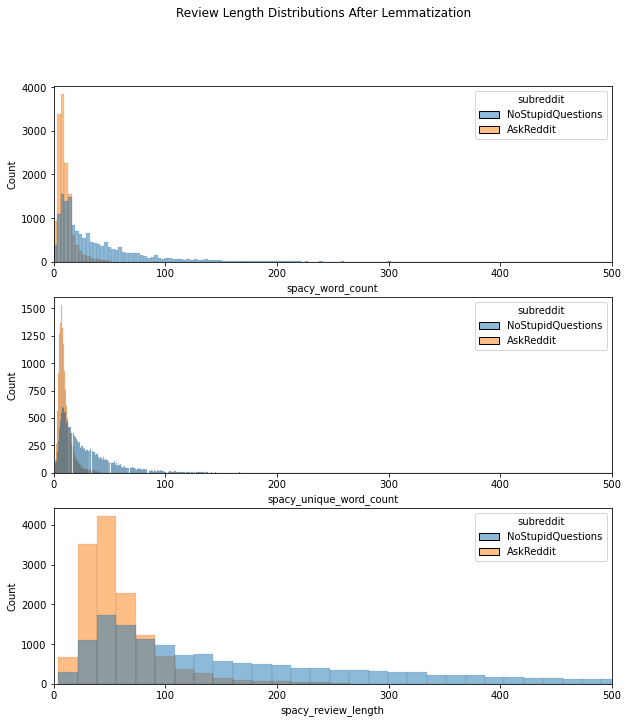

In [18]:
cols = ['spacy_word_count', 'spacy_unique_word_count',  'spacy_review_length']
fig, axs = plt.subplots(3,1, figsize=(10,11), sharey='row')
for i,ax in enumerate(axs.ravel()):
    sns.histplot(data = data, x = cols[i], ax=ax, hue='subreddit', bins=700)\
    .set(xlabel = cols[i], xlim=[0,500])
plt.suptitle('Review Length Distributions After Lemmatization');

#### Surprisingly these distributions look very different based on the subreddit. Maybe could use this as a feature in the models. Curious to see the difference in the skew. Can see the clear effect of lemmatization in decreasing the number of unique words. 

In [10]:
print(f"NoStupidQuestions: \ntext_unique_word_count mean: {data['text_unique_word_count'][data['subreddit']=='NoStupidQuestions'].mean()}, \
text_unique_word_count skew: {data['text_unique_word_count'][data['subreddit']=='NoStupidQuestions'].skew()}\n\
spacy_unique_word_count mean: {data['spacy_unique_word_count'][data['subreddit']=='NoStupidQuestions'].mean()}, \
spacy_unique_word_count skew: {data['spacy_unique_word_count'][data['subreddit']=='NoStupidQuestions'].skew()}\n\n")

print(f"AskReddit: \ntext_unique_word_count mean: {data['text_unique_word_count'][data['subreddit']=='AskReddit'].mean()}, \
text_unique_word_count skew: {data['text_unique_word_count'][data['subreddit']=='AskReddit'].skew()}\n\
spacy_unique_word_count mean: {data['spacy_unique_word_count'][data['subreddit']=='AskReddit'].mean()}, \
spacy_unique_word_count skew: {data['spacy_unique_word_count'][data['subreddit']=='AskReddit'].skew()}")

NoStupidQuestions: 
text_unique_word_count mean: 39.09007469299912, text_unique_word_count skew: 3.978460775650911
spacy_unique_word_count mean: 29.10982402835802, spacy_unique_word_count skew: 3.1703388956917364


AskReddit: 
text_unique_word_count mean: 12.917451804609364, text_unique_word_count skew: 1.8871096149642543
spacy_unique_word_count mean: 9.588998405566024, spacy_unique_word_count skew: 1.819685362405046


#### Don't know if this will be useful, but there it is. Going to write `spacy_unique_word_count` to the csv to possibly use in the analysis.

In [34]:
data.drop(columns=['text_word_count','text_unique_word_count','spacy_word_count','spacy_review_length','text_review_length']).to_csv('data/data_cleaned.csv', index=False)

#### Now going to use CountVectorizer() to investigate most common words

In [7]:
cv = CountVectorizer(stop_words='english')
spacy_cv = cv.fit_transform(data['spacy'])
spacy_cv = pd.DataFrame(spacy_cv.A, columns = cv.get_feature_names_out())
spacy_cv

,aa,aaa,aaaaaaaafjq,aaaaad,aaaaah,aaaand,aabe,aaron,ab,aback,...,𝘾𝙡𝙖𝙞𝙢,𝙁𝙧𝙚𝙚,𝙄𝙩,𝙉𝙁𝙏𝙨,𝙋𝙚𝙤𝙥𝙡𝙚,𝙏𝙤,𝙛𝙞𝙧𝙨𝙩,𝙛𝙤𝙧,𝙞𝙨,𝙢𝙤𝙨𝙩
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Can already see there are far too many features, and some encoding problems. Let's see if changing `min_df` will help.

In [8]:
cv = CountVectorizer(stop_words='english', min_df=2)
spacy_cv = cv.fit_transform(data['spacy'])
spacy_cv = pd.DataFrame(spacy_cv.A, columns = cv.get_feature_names_out())
spacy_cv

,aa,ab,aback,abandon,abbreviation,abdominal,abella,abide,ability,abit,...,zone,zoo,zoom,zoomer,zoophile,zuck,zuckerberg,zuuehzd,𝗥𝗼𝗹𝗹𝘀,𝗥𝗼𝘆𝗰𝗲
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Cut the number of features by almost half which is good, still some funny stuff coming through. This can be solved with a grid search later, for now I want to investigate most/least frequent words by subreddit

In [9]:
data_cv = pd.concat([spacy_cv, data['subreddit'].rename('Subreddit')], axis=1)
data_cv

,aa,ab,aback,abandon,abbreviation,abdominal,abella,abide,ability,abit,...,zoo,zoom,zoomer,zoophile,zuck,zuckerberg,zuuehzd,𝗥𝗼𝗹𝗹𝘀,𝗥𝗼𝘆𝗰𝗲,Subreddit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NoStupidQuestions
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NoStupidQuestions
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NoStupidQuestions
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NoStupidQuestions
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NoStupidQuestions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AskReddit
29592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AskReddit
29593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AskReddit
29594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AskReddit


In [10]:
total_words = data_cv.groupby('Subreddit').sum()

In [11]:
words_askreddit = total_words.loc['AskReddit'][total_words.loc['AskReddit'] > 1].sort_values()
words_nostupidquestions = total_words.loc['NoStupidQuestions'][total_words.loc['NoStupidQuestions'] > 1].sort_values()
pd.concat([words_askreddit.head(20), words_nostupidquestions.head(20)], axis=1)

,AskReddit,NoStupidQuestions
ab,2.0,NaN
derive,2.0,NaN
depp,2.0,NaN
deposit,2.0,NaN
nuanced,2.0,NaN
deny,2.0,NaN
denver,2.0,NaN
nurses,2.0,NaN
denial,2.0,NaN
demonstrably,2.0,NaN


#### Looks like I will still need to increase the `min_df` to get rid of some junk

In [12]:
pd.concat([words_askreddit.tail(20), words_nostupidquestions.tail(20)], axis=1)

,AskReddit,NoStupidQuestions
man,330.0,NaN
just,363.0,4762.0
way,385.0,1313.0
feel,388.0,2023.0
use,394.0,1985.0
want,408.0,2318.0
year,413.0,1606.0
say,419.0,2817.0
movie,445.0,NaN
bad,469.0,NaN


#### Interesting to see that r/NoStupidQuestions has a much higher common word count than r/AskReddit.
#### Just going to repeat some of the earlier steps to make sure TfidfVectorizer has similar behavior

In [13]:
tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(data['spacy'])
X_tfidf = pd.DataFrame(X_tfidf.A, columns=tfidf.get_feature_names_out())
X_tfidf

,aa,aaa,aaaaaaaafjq,aaaaad,aaaaah,aaaand,aabe,aaron,ab,aback,...,𝘾𝙡𝙖𝙞𝙢,𝙁𝙧𝙚𝙚,𝙄𝙩,𝙉𝙁𝙏𝙨,𝙋𝙚𝙤𝙥𝙡𝙚,𝙏𝙤,𝙛𝙞𝙧𝙨𝙩,𝙛𝙤𝙧,𝙞𝙨,𝙢𝙤𝙨𝙩
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Again far too many columns with only `stop_words` set. 

In [14]:
tfidf = TfidfVectorizer(stop_words='english', min_df=2)
X_tfidf = tfidf.fit_transform(data['spacy'])
X_tfidf = pd.DataFrame(X_tfidf.A, columns=tfidf.get_feature_names_out())
X_tfidf

,aa,ab,aback,abandon,abbreviation,abdominal,abella,abide,ability,abit,...,zone,zoo,zoom,zoomer,zoophile,zuck,zuckerberg,zuuehzd,𝗥𝗼𝗹𝗹𝘀,𝗥𝗼𝘆𝗰𝗲
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Number of features identical. Now let's explore including bigrams

In [15]:
cv_ngrams = CountVectorizer(stop_words='english', min_df=2, ngram_range=(1,2))
spacy_cv = cv_ngrams.fit_transform(data['spacy'])
spacy_cv = pd.DataFrame(spacy_cv.A, columns = cv_ngrams.get_feature_names_out())
spacy_cv

,aa,ab,ab channel,aback,abandon,abandon family,abandon place,abbreviation,abdominal,abella,...,zoomer,zoomer like,zoophile,zuck,zuckerberg,zuuehzd,zuuehzd smell,𝗥𝗼𝗹𝗹𝘀,𝗥𝗼𝗹𝗹𝘀 𝗥𝗼𝘆𝗰𝗲,𝗥𝗼𝘆𝗰𝗲
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Too many features, can `min_df` solve this?

In [16]:
cv_ngrams = CountVectorizer(stop_words='english', min_df=3, ngram_range=(1,2))
spacy_cv = cv_ngrams.fit_transform(data['spacy'])
spacy_cv = pd.DataFrame(spacy_cv.A, columns = cv_ngrams.get_feature_names_out())
spacy_cv

,aa,ab,ab channel,abandon,abdominal,abide,ability,ability learn,ability walk,able,...,zombie,zombie apocalypse,zone,zone feel,zoo,zoom,zoomer,zuckerberg,zuuehzd,zuuehzd smell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Already fewer features than data! Want to see the impact of including `max_df` as well.

In [17]:
cv_ngrams = CountVectorizer(stop_words='english', min_df=3, max_df=.1, ngram_range=(1,2))
spacy_cv = cv_ngrams.fit_transform(data['spacy'])
spacy_cv = pd.DataFrame(spacy_cv.A, columns = cv_ngrams.get_feature_names_out())
spacy_cv

,aa,ab,ab channel,abandon,abdominal,abide,ability,ability learn,ability walk,able,...,zombie,zombie apocalypse,zone,zone feel,zoo,zoom,zoomer,zuckerberg,zuuehzd,zuuehzd smell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data_cv = pd.concat([spacy_cv, data['subreddit'].rename('Subreddit')], axis=1)
total_words = data_cv.groupby('Subreddit').sum()

In [19]:
words_askreddit = total_words.loc['AskReddit'][total_words.loc['AskReddit'] > 1].sort_values()
words_nostupidquestions = total_words.loc['NoStupidQuestions'][total_words.loc['NoStupidQuestions'] > 1].sort_values()
pd.concat([words_askreddit.tail(20), words_nostupidquestions.tail(20)], axis=1)

,AskReddit,NoStupidQuestions
guy,310.0,NaN
woman,311.0,NaN
favorite,317.0,NaN
man,330.0,NaN
way,385.0,1313.0
feel,388.0,2023.0
use,394.0,1985.0
want,408.0,2318.0
year,413.0,1606.0
say,419.0,2817.0


#### This max_df setting cut out some common words, but many of these top most common are present in both datasets (concerning). Let's focus specifically on bigrams to see if that distribution is more different.

In [20]:
bigrams_cv = CountVectorizer(stop_words='english', min_df=3, ngram_range=(2,2))
bigrams = bigrams_cv.fit_transform(data['spacy'])
bigrams = pd.DataFrame(bigrams.A, columns=bigrams_cv.get_feature_names_out())
bigrams

,ab channel,ability learn,ability walk,able afford,able break,able buy,able change,able choose,able come,able easily,...,youtube video,youtube watch,yr old,yu hakasho,yu yu,ziploc bag,zodiac sign,zombie apocalypse,zone feel,zuuehzd smell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
bigrams_by_subreddit = pd.concat([bigrams, data['subreddit'].rename('Subreddit')], axis=1).groupby('Subreddit').sum()

In [22]:
bigrams_nostupidquestions = bigrams_by_subreddit.loc['NoStupidQuestions'].sort_values(ascending=False)
bigrams_askreddit = bigrams_by_subreddit.loc['AskReddit'].sort_values(ascending=False)
pd.concat([bigrams_askreddit, bigrams_nostupidquestions, bigrams_askreddit/bigrams_nostupidquestions], axis=1).head(20)

,AskReddit,NoStupidQuestions,0
people reddit,144,19,7.578947
feel like,92,676,0.136095
good way,84,86,0.976744
elon musk,79,68,1.161765
year old,77,269,0.286245
woman reddit,75,7,10.714286
social medium,71,124,0.572581
video game,61,77,0.792208
bad thing,58,40,1.450000
man reddit,57,5,11.400000


#### There is still overlap, but there are many more disproportionately populated bigrams than unigrams, which means I will definitely be including bigrams in the vectorizer when gridsearching during modeling. This also means that I will need to tune `min_df` in order to reduce the feature space further to be able to include both unigrams and bigrams.

In [23]:
cv = CountVectorizer(stop_words='english', min_df=4, ngram_range=(1,2))
data_cv = cv.fit_transform(data['spacy'])
data_cv = pd.DataFrame(data_cv.A, columns=cv.get_feature_names_out())
data_cv.shape

(29596, 16623)

#### So I have learned that `min_df=4` will be the lower limit of this parameter when using `ngram_range=(1,2)`. Will probably set this as default wherever possible to ensure consistency in the searches and keep my feature space limited. Also learned that I could use the length of a review as a parameter, though I will leave that to the end of the modeling process if time permits. 